In [1]:
import numpy as np

In [2]:
from scipy.interpolate import interp1d

In [3]:
falling = 2
start = -np.pi
end = np.pi/falling
x1 = np.linspace(start, 0, 50)
x2 = np.linspace(0, end, 40)
x2_edge = np.linspace(end, np.pi, 10)
s1 = np.cos(x1)
s2 = np.cos(falling*x2)
s2_edge = [-1]*10
x = np.hstack([x1, x2, x2_edge]) / np.pi
s = np.hstack([s1, s2, s2_edge])
f_peak = interp1d(x, s)

In [4]:
xn = np.linspace(-1, 1, 100)
sn = f_peak(xn)

In [5]:
import matplotlib

In [6]:
from matplotlib.pyplot import plot

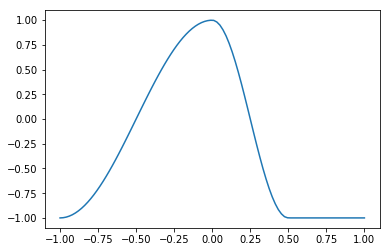

In [7]:
plot(xn, sn)

In [8]:
20*5*60

6000

In [9]:
x= np.linspace(0, 10, 100)
s = np.sin(x)
c = np.sin(2*x)
d = np.sin(3*x)
smooth = []

In [10]:
f = interp1d(x, np.maximum(c, s, d), kind="cubic")

In [11]:
enveloppe = np.maximum(c, s, d)

In [12]:
derivative = [enveloppe[i+1] - enveloppe[i] for i in range(len(enveloppe)-1)]
derivative = derivative + [derivative[-1]]

In [13]:
derivative2 = [derivative[i+1] - derivative[i] for i in range(len(derivative)-1)]
derivative2 = derivative2 + [derivative2[-1]]

In [14]:
len(derivative)

100

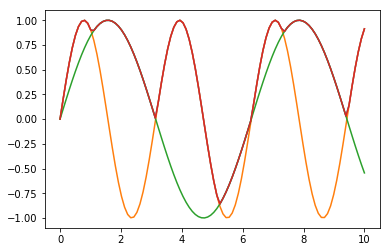

In [17]:
plot(x,enveloppe)
plot(x,c)
plot(x,s)
plot(x,d)
#plot(x,derivative)
#plot(x,derivative2)

array([ 0.        ,  0.2984138 ,  0.56963411,  0.78894546,  0.93636273,
        0.99845223,  0.96955595,  0.98775469,  0.99897117,  0.96955595,
        0.90070545,  0.79522006,  0.65739025,  0.49282204,  0.30820902,
        0.11106004, -0.09060615, -0.28858706, -0.47483011, -0.50174037,
       -0.22074597,  0.0803643 ,  0.37415123,  0.63384295,  0.83577457,
        0.96154471,  0.99969234,  0.94674118,  0.8075165 ,  0.59470541,
        0.32770071,  0.03083368,  0.18046693,  0.37415123,  0.55261747,
        0.7086068 ,  0.83577457,  0.92894843,  0.98433866,  0.99969234,
        0.97438499,  0.90944594,  0.8075165 ,  0.6727425 ,  0.69395153,
        0.87719715,  0.98050658,  0.99446556,  0.91780205,  0.75750216,
        0.5281735 ,  0.25071407, -0.04959214, -0.34537917, -0.6096929 ,
       -0.81844725, -0.95000106, -0.86802917, -0.75075145, -0.60293801,
       -0.43060093, -0.24074979, -0.0411065 ,  0.23901679,  0.51789078,
        0.74957103,  0.91294525,  0.99312567,  0.9828057 ,  0.98

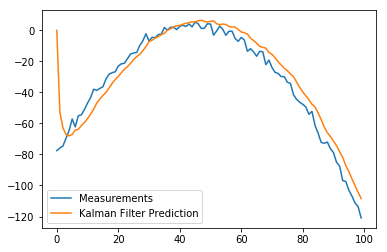

In [376]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

def example():
	dt = 1.0/60
	F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
	R = np.array([0.5]).reshape(1, 1)

	x = np.linspace(-10, 10, 100)
	measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)

	kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
	predictions = []

	for z in measurements:
		predictions.append(np.dot(H,  kf.predict())[0])
		kf.update(z)

	import matplotlib.pyplot as plt
	plt.plot(range(len(measurements)), measurements, label = 'Measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
	plt.legend()
	plt.show()

if __name__ == '__main__':
    example()


In [385]:
dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)
kf = KalmanFilter(F = F, H = H, Q=Q, R=R)
predictions = []

for z in enveloppe:
    predictions.append(np.dot(H,  kf.predict())[0])
    kf.update(z)

In [387]:
import numpy as np
array = [1, 20, 55, 33, 4555555, 1]
arrayCompare = zip(array, array[1:] + [0], [0] + array)

weights = [.7 * x + .15 * (y + z) for x, y, z in arrayCompare]

avg = np.average(array, weights=weights)


In [388]:
avg

3188821.912490662